<a href="https://colab.research.google.com/github/KellieLeonard-Biostat/WDBC-Dataset/blob/main/Breast_Cancer_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt


In [ ]:
from sklearn.datasets import load_breast_cancer

# Loaded dataset
data = load_breast_cancer()
df = pd.DataFrame(data.data, columns=data.feature_names)
df['target'] = data.target

# Selected features related to nuclei size and shape
size_shape_features = ['mean radius', 'mean texture', 'mean perimeter', 'mean area', 'mean smoothness']
X = df[size_shape_features]
y = df['target']

# Checked the dataset
print("Dataset shape:", X.shape)
print(df.head())


Dataset shape: (569, 5)
   mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
0        17.99         10.38          122.80     1001.0          0.11840   
1        20.57         17.77          132.90     1326.0          0.08474   
2        19.69         21.25          130.00     1203.0          0.10960   
3        11.42         20.38           77.58      386.1          0.14250   
4        20.29         14.34          135.10     1297.0          0.10030   

   mean compactness  mean concavity  mean concave points  mean symmetry  \
0           0.27760          0.3001              0.14710         0.2419   
1           0.07864          0.0869              0.07017         0.1812   
2           0.15990          0.1974              0.12790         0.2069   
3           0.28390          0.2414              0.10520         0.2597   
4           0.13280          0.1980              0.10430         0.1809   

   mean fractal dimension  ...  worst texture  worst perimeter  wors

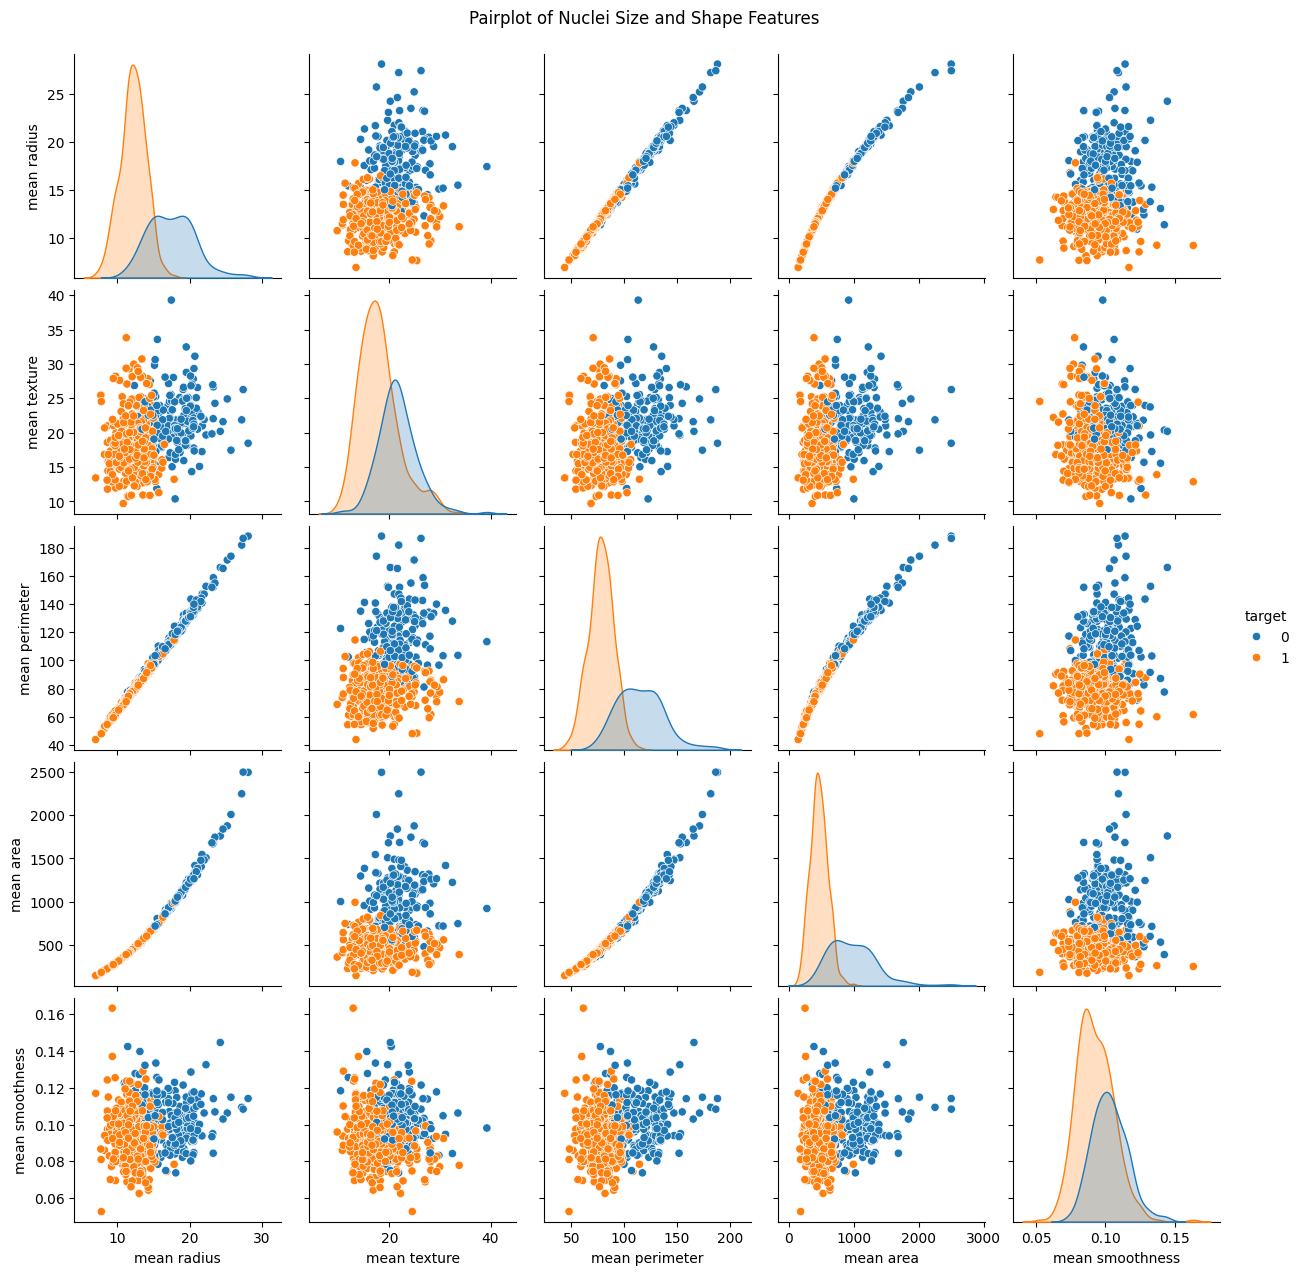

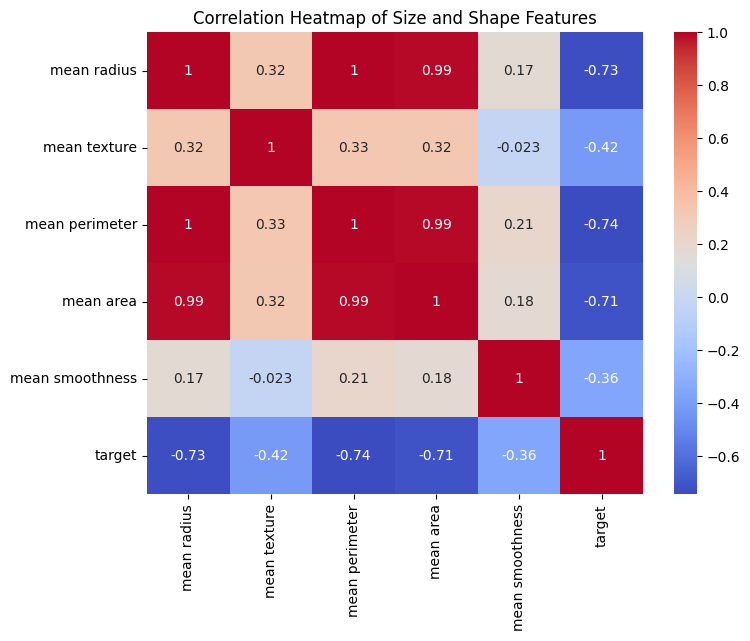

In [ ]:
# Pairplot of size and shape features colored by the target
sns.pairplot(df, vars=size_shape_features, hue='target', diag_kind='kde')
plt.suptitle("Pairplot of Nuclei Size and Shape Features", y=1.02)
plt.show()

# Correlation heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(df[size_shape_features + ['target']].corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap of Size and Shape Features")
plt.show()


In [ ]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Scaled the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [ ]:
# Trained a Random Forest Classifier
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Made predictions
y_pred = model.predict(X_test)


Model Accuracy: 0.92


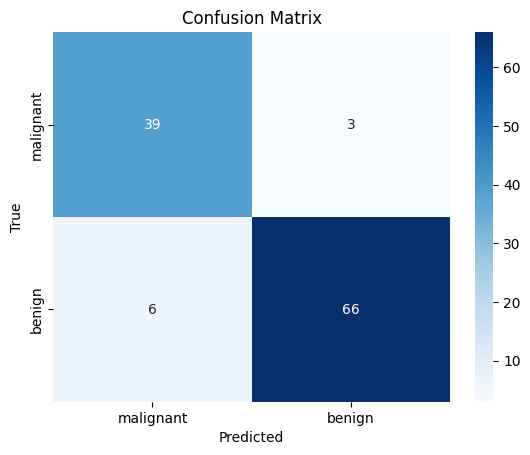

Classification Report:
              precision    recall  f1-score   support

   malignant       0.87      0.93      0.90        42
      benign       0.96      0.92      0.94        72

    accuracy                           0.92       114
   macro avg       0.91      0.92      0.92       114
weighted avg       0.92      0.92      0.92       114



In [ ]:
# Accuracy Score
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy:.2f}")

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=data.target_names, yticklabels=data.target_names)
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix")
plt.show()

# Classification Report
print("Classification Report:")
print(classification_report(y_test, y_pred, target_names=data.target_names))


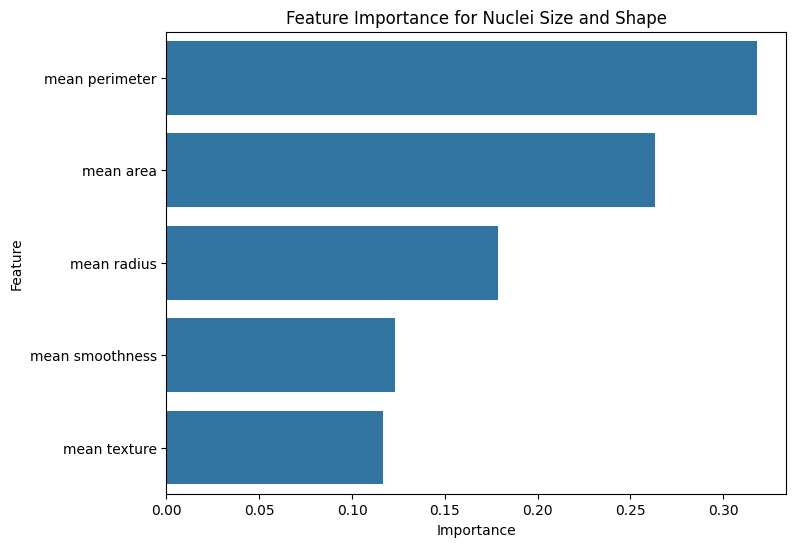

In [ ]:
# Feature Importance
importances = model.feature_importances_
feature_importance_df = pd.DataFrame({'Feature': size_shape_features, 'Importance': importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Plot feature importance
plt.figure(figsize=(8, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df)
plt.title("Feature Importance for Nuclei Size and Shape")
plt.show()


In [ ]:
import joblib

# Save the model
joblib.dump(model, "breast_cancer_nuclei_model.pkl")

# Load the model
loaded_model = joblib.load("breast_cancer_nuclei_model.pkl")


In [ ]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10]
}

grid_search = GridSearchCV(RandomForestClassifier(random_state=42), param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Best model
best_model = grid_search.best_estimator_
print("Best Parameters:", grid_search.best_params_)


Best Parameters: {'max_depth': 10, 'min_samples_split': 2, 'n_estimators': 200}


In [ ]:
import tensorflow as tf
from tensorflow import keras

# Built a simple neural network
model_nn = keras.Sequential([
    keras.layers.Dense(16, activation='relu', input_shape=(X_train.shape[1],)),  # First hidden layer
    keras.layers.Dense(8, activation='relu'),  # Second hidden layer
    keras.layers.Dense(1, activation='sigmoid')  # Output layer
])

# Compiled the model
model_nn.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Trained the model
model_nn.fit(X_train, y_train, epochs=50, validation_data=(X_test, y_test), batch_size=10)

# Evaluated the model
loss, accuracy = model_nn.evaluate(X_test, y_test)
print(f"Neural Network Accuracy: {accuracy:.2f}")


Epoch 1/50


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


46/46 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.4704 - loss: 0.6574 - val_accuracy: 0.7281 - val_loss: 0.5493
Epoch 2/50
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7904 - loss: 0.5419 - val_accuracy: 0.8772 - val_loss: 0.4679
Epoch 3/50
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9075 - loss: 0.4429 - val_accuracy: 0.8947 - val_loss: 0.3808
Epoch 4/50
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9359 - loss: 0.3596 - val_accuracy: 0.8860 - val_loss: 0.3113
Epoch 5/50
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9256 - loss: 0.2715 - val_accuracy: 0.8772 - val_loss: 0.2621
Epoch 6/50
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9471 - loss: 0.2147 - val_accuracy: 0.8772 - val_loss: 0.2397
Epoch 7/50
46/46 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.9218 - loss: 0.2007 - val_accuracy: 0.8860 - val_loss: 0.2359
Epoch 8/50
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9484 - loss: 0.1709 - val_accuracy: 0.8772 - val_loss: 0.2373
Epo

['Malignant' 'Benign']


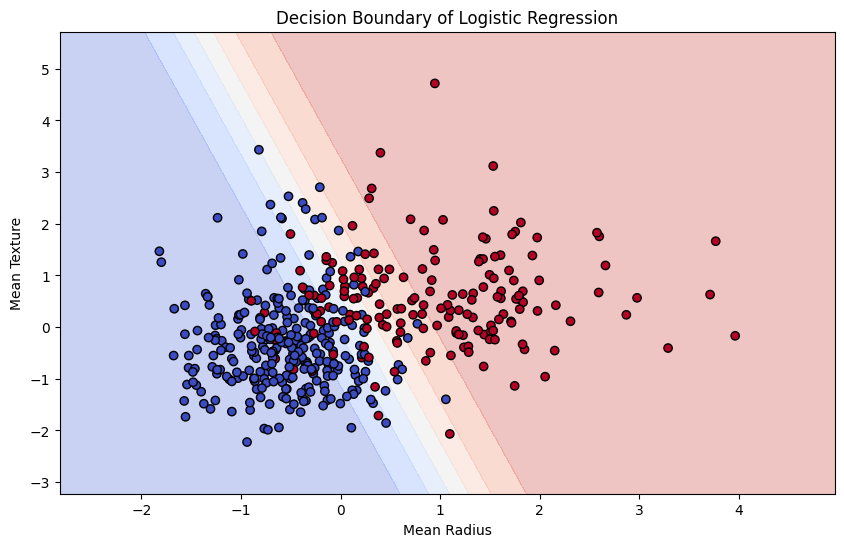

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Loaded dataset
X = df[['mean radius', 'mean texture']].values  # Selecting two features for 2D visualization
print(df['target'].unique())
y = df['target'].values

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardized features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Trained logistic regression model
model = LogisticRegression()
model.fit(X_train, y_train)

# Plotted decision boundary
x_min, x_max = X_train[:, 0].min() - 1, X_train[:, 0].max() + 1
y_min, y_max = X_train[:, 1].min() - 1, X_train[:, 1].max() + 1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100), np.linspace(y_min, y_max, 100))

# Predicted probabilities instead of class labels for contour plot
Z = model.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1]  # Probability of class 1 (Malignant)
Z = Z.reshape(xx.shape)

plt.figure(figsize=(10, 6))
plt.contourf(xx, yy, Z, alpha=0.3, cmap='coolwarm')
plt.scatter(X_train[:, 0], X_train[:, 1], c=[1 if label == 'Malignant' else 0 for label in y_train], cmap='coolwarm', edgecolors='k')
plt.xlabel("Mean Radius")
plt.ylabel("Mean Texture")
plt.title("Decision Boundary of Logistic Regression")
plt.show()

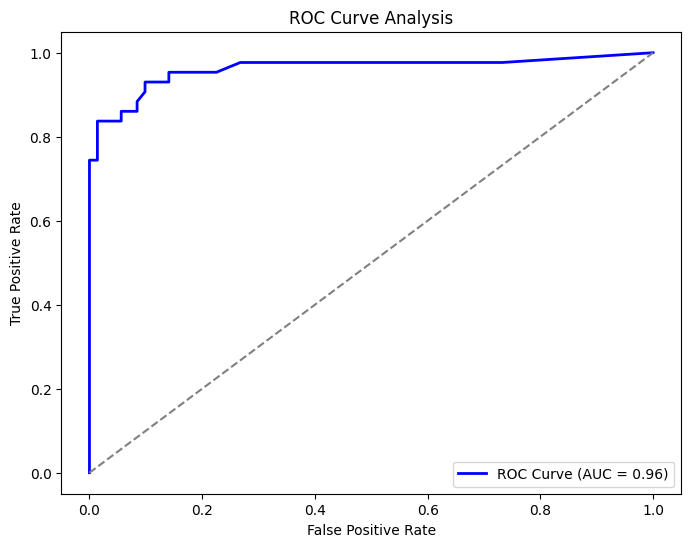

In [ ]:
from sklearn.metrics import roc_curve, auc
from sklearn.ensemble import RandomForestClassifier

# Trained a classification model
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)

# Predicted probabilities
y_probs = clf.predict_proba(X_test)[:, 1]

# Computed ROC curve
fpr, tpr, _ = roc_curve(y_test, y_probs, pos_label='Malignant')  # Specify 'Malignant' as the positive class
roc_auc = auc(fpr, tpr)

# Plotted ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve Analysis")
plt.legend(loc="lower right")
plt.show()
